In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import BarChart, Reference

In [5]:
# Step 1: Prepare Data
data = {
    "Player": [
        "Rohit Sharma", "Virat Kohli", "Rishabh Pant", "Suryakumar Yadav",
        "Shivam Dube", "Hardik Pandya", "Axar Patel", "Ravindra Jadeja",
        "Kuldeep Yadav", "Arshdeep Singh", "Jasprit Bumrah"
    ],
    "CP":  [5, 3, 6, 4, 2, 3, 4, 5, 3, 4, 2],
    "GT":  [2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1],
    "C":   [1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0],
    "DC":  [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
    "ST":  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    "RO":  [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
    "MRO": [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    "DH":  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "RS":  [8, 5, 10, 6, -2, 5, 4, 7, 3, 4, 2]
}

weights = {
    "WCP": 0.5, "WGT": 0.75, "WC": 1.0, "WDC": -1.0,
    "WST": 0.75, "WRO": 1.0, "WMRO": -1.0, "WDH": 1.0
}
# Step 2: Create DataFrame
df = pd.DataFrame(data)

df["PS"] = (
    df["CP"] * weights["WCP"] +
    df["GT"] * weights["WGT"] +
    df["C"] * weights["WC"] +
    df["DC"] * weights["WDC"] +
    df["ST"] * weights["WST"] +
    df["RO"] * weights["WRO"] +
    df["MRO"] * weights["WMRO"] +
    df["DH"] * weights["WDH"] +
    df["RS"]
)


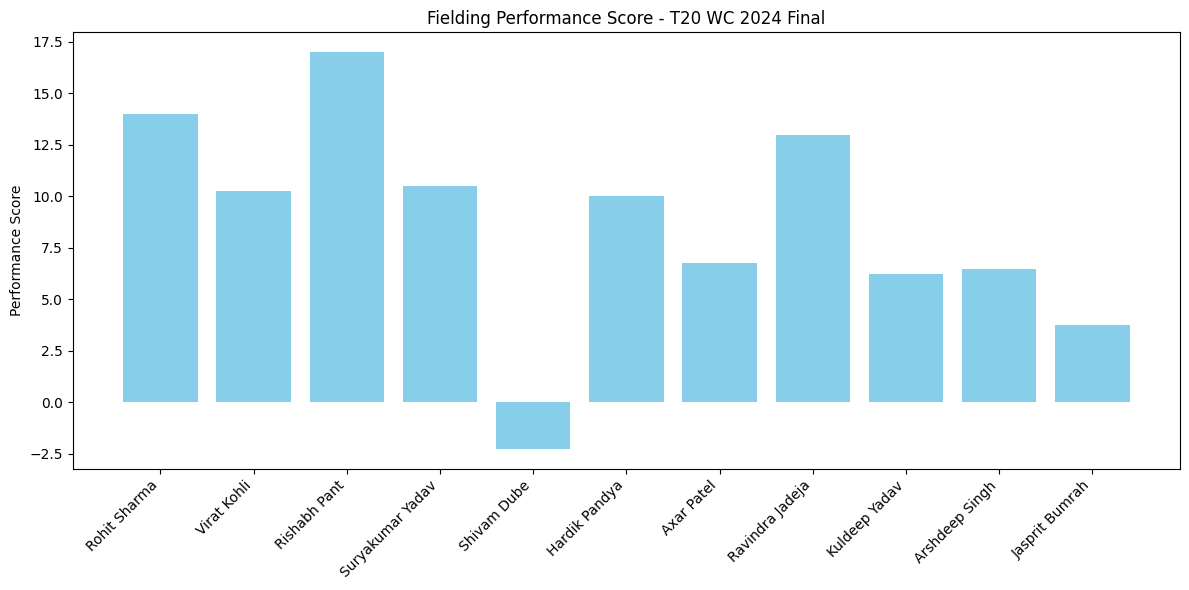

In [7]:
# Step 3: Add 10 Advanced Features
max_ps = df["PS"].max()
df["Efficiency (%)"] = (df["PS"] / max_ps * 100).round(2)

def assign_grade(score):
    if score >= 80:
        return "A"
    elif score >= 50:
        return "B"
    else:
        return "C"

df["Grade"] = df["Efficiency (%)"].apply(assign_grade)
df["Top Performer"] = df["PS"] == max_ps

def category_label(grade):
    if grade == "A":
        return "Elite"
    elif grade == "B":
        return "Reliable"
    else:
        return "Needs Improvement"

df["Category"] = df["Grade"].apply(category_label)

# 1. Impact Index
df["Impact Index"] = (df["PS"] / max_ps * 100).round(2)

# 2. Error Count
df["Error Count"] = df["DC"] + df["MRO"]

# 3. Total Contributions
df["Total Contributions"] = df["CP"] + df["GT"] + df["C"] + df["ST"] + df["RO"] + df["DH"]

# 4. Positional Value (bonus: RO + ST × 1.5)
df["Positional Value"] = df["RO"] + df["ST"] * 1.5

# 5. Consistency Score
df["Consistency Score"] = (df["Efficiency (%)"] / (1 + df["Error Count"])).round(2)

# 6. Participation Rate
max_contrib = df["Total Contributions"].max()
df["Participation Rate (%)"] = (df["Total Contributions"] / max_contrib * 100).round(2)

# 7. Discipline Index
df["Discipline Index"] = (1 / (1 + df["Error Count"])).round(2)

# 8. Fielding Rank
df["Fielding Rank"] = df["PS"].rank(ascending=False).astype(int)

# 9. Remarks
def remarks(row):
    if row["Grade"] == "A" and row["Error Count"] == 0:
        return "Excellent"
    elif row["Grade"] == "B":
        return "Improving"
    else:
        return "Needs Training"

df["Remarks"] = df.apply(remarks, axis=1)

# Step 4: Plot Jupyter Chart
plt.figure(figsize=(12, 6))
plt.bar(df["Player"], df["PS"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Fielding Performance Score - T20 WC 2024 Final")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.savefig("final_performance_chart.png")
plt.show()

# Step 5: Save to Excel with All Features
wb = Workbook()
ws = wb.active
ws.title = "India Fielding T20 WC Final"

# Write dataframe rows
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# Create Excel chart
chart = BarChart()
chart.title = "Performance Score"
chart.x_axis.title = 'Player'
chart.y_axis.title = 'Score'
chart.height = 10
chart.width = 20

ps_col = df.columns.get_loc("PS") + 1
data_ref = Reference(ws, min_col=ps_col, min_row=1, max_row=len(df)+1)
cat_ref = Reference(ws, min_col=1, min_row=2, max_row=len(df)+1)
chart.add_data(data_ref, titles_from_data=True)
chart.set_categories(cat_ref)
ws.add_chart(chart, "AA2")

# Save the file
excel_path = "India_Fielding_T20WC2024_Final_10_Features.xlsx"
wb.save(excel_path)

excel_path="final_performance_chart.png"